<a href="https://colab.research.google.com/github/helen-yao/codeathon3/blob/main/arc3ep_codeathon_3_ai_chatbot_generation_with_llms_student_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Codeathon 3: AI Chatbot Generation with LLMs
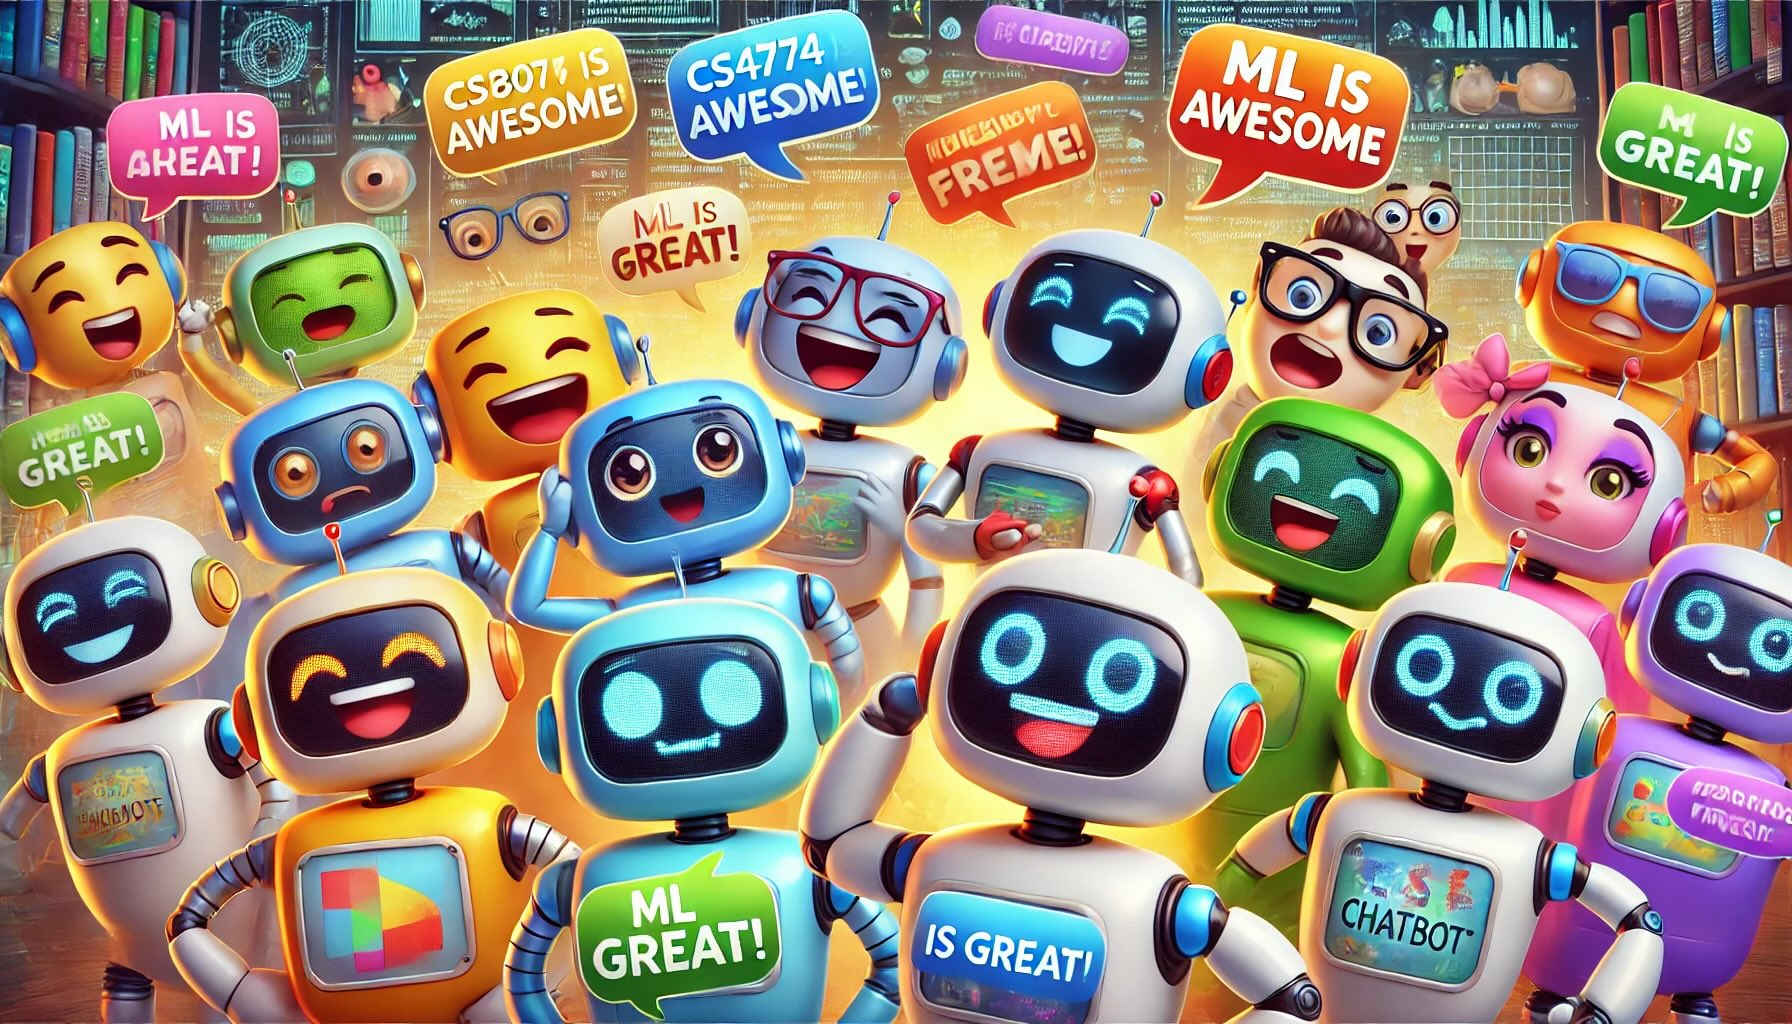
Alan Turing once posed the question, "Can machines think?" Today, chatbots powered by large language models (LLMs) are among the most sophisticated examples of machines engaging in human-like conversation. For this Codeathon, your task is to leverage an LLM to build a chatbot that can understand and respond intelligently to user queries. This chatbot will explore natural language processing, sequence modeling, and language generation fundamentals.

In this codeathon, you'll implement at least two out of three leading LLMs—OpenAI GPT, Meta LLaMA, and Google Gemini—to build your chatbot. You'll then analyze the unique characteristics and performance of each model, iterating with fine-tuning to see how the models evolve in response quality.

* **Design**: Your task is to connect and configure the LLMs and implement them in a chatbot that can handle structured, engaging conversations. You will observe and analyze differences between the models in handling conversations. You'll also fine-tune the model to improve response quality.

* **Implementation**: To get you started, you can use the code provided in the template. You'll integrate each model via API, compare responses, and implement a chatbot-to-chatbot loop where the two models "talk" to each other for a fixed number of exchanges. Fine-tune the models using a small/large dataset to see how their responses improve. Finally, implement a benchmark system that ranks the performance of each LLMs based on a standardized test, helping you compare the effectiveness of each model.


To make it easier for you, some code has been provided to help you connect with the APIs and process the data. You may modify it to fit your needs. Please submit the .ipynb file via UVA Canvas in the following format: **yourComputingID_codeathon_3.ipynb**


**Important Note**: Make sure your submission contains the outputs as TAs will not be able to directly run your code due to API security.

## 1. Dependencies
**Objective**: Set up the necessary environment and install dependencies to run the models.

*   Install Necessary Libraries: Download and install packages such as transformers, torch, and openai.
* Important Note: Use a T4 or equivalent GPU in Colab for optimal performance, as some functions require GPU access.

In [16]:
# Install the OpenAI library for interacting with OpenAI's GPT models
!pip install openai
# Install the Google Generative AI library for interacting with Google Gemini models
!pip install -q -U google-generativeai
# Install Hugging Face Transformers, PyTorch, and Accelerate for working with various language models
# Install bitsandbytes for efficient model quantization
!pip install transformers torch accelerate bitsandbytes
# Upgrade Transformers to the latest version to ensure compatibility with recent models and features
!pip install --upgrade transformers
# (Optional) Install llama-recipes if you plan to fine-tune LLaMA models; also install ipywidgets for interactive widgets in Jupyter
# !pip install llama-recipes ipywidgets
# Install NLTK and rouge-score for evaluating text generation models using BLEU, ROUGE, and other language metrics
!pip install nltk rouge-score
# Install bert-score for evaluating model performance based on BERT embeddings for semantic similarity
!pip install bert-score

!pip install httpx==0.27.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.3
    Uninstalling transformers-4.46.3:
      Successfully uninstalled transformers-4.46.3


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=edabe58d6a54804a16a9acb7e8817a4d5658434ede6285db19705359f7b3d6c2
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.0
    Uninstalling httpx-0.28.0:
      Successfully uninstalled httpx-0.28.0


## 2. Models Setup
**Objective**: Explore at least two out of three models available in this Codeathon—GPT, LLaMA, and Gemini—and use them to perform text generation. Optional tasks include multimedia generation and analysis.

*   Check [Video](https://youtu.be/tD4eW3q02ZE?si=wqgrCeCL27TtKnoF) Tutorial for step-by-step API key setup corresponding to [ReadMe](https://docs.google.com/document/d/1S0wQ4bc88NMbjQJRrU86mRPxoi_urUL4uD5tTo-9KYQ/edit?usp=sharing).
* Model Initialization: Configure each model you choose through its API through corresponding Classes **(Gemini_Chatbot(), LLaMA_Chatbot(), OpenAI_Chatbot())** for generating responses.
* Make sure your chatbots could access the **entire chat history** instead of the just last reply and be able to **reset** the chat history. Print results to check!
* Text Generation: Test each model on basic text-generation tasks. Note the style, coherence, and clarity of their responses.
* (Optional) Multimedia Support:

 * Audio Input: Test a model that can analyze audio input.
 * Image Input: Test a model that can analyze image input.
 * Generation: Use a model to generate image and audio output if possible.

Please Note: While Meta Llama and Google Gemini offer free models usage through APIs, OpenAI GPT is not free of charge. Check the Video for more information.

Official Documentations: [Google Gemini Documentation](https://ai.google.dev/api?authuser=2&lang=python), [OpenAI GPT Documentation](https://platform.openai.com/docs/overview), [Meta Llama Documentation](https://www.llama.com/docs/overview).








### Gemini

In [5]:
# Take Gemini as an example, you don't have to use it.
import google.generativeai as genai
# Get access to the colab secret key chain
from google.colab import userdata

# Example Set Up of the API key stored in Google Colab secret keys
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

class Gemini_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.model = genai.GenerativeModel("gemini-1.5-flash") #choose your model here
        self.history = [{"role": "model", "parts": system_prompt}]
        self.system_prompt = system_prompt

    # To do: implment the convser function to return the gemini response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    def converse(self, user_input):
      chat = self.model.start_chat(history=self.history)
      response = chat.send_message(user_input)
      self.history.append({"role":"user", "parts":user_input})
      self.history.append({"role":"model","parts":response.text})
      return response.text


    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
      self.history = [{"role": "model", "parts": system_prompt}]
      self.system_prompt = system_prompt

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["parts"]
            print(f"{role}: {content}\n")

# Test your implmentation!
gemini_chatbot = Gemini_Chatbot()

prompt = "Explain the concept of Generative AI."
response = gemini_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = gemini_chatbot.converse(prompt)
print("Conversation History:\n")
gemini_chatbot.print_history()

gemini_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
gemini_chatbot.print_history()

Conversation History:

Model: You are a helpful assistant.

User: Explain the concept of Generative AI.

Model: Generative AI refers to a category of artificial intelligence algorithms that can create new content, rather than just analyzing or classifying existing data.  Instead of simply recognizing patterns, these models learn the underlying patterns and structures of the input data and then use this knowledge to generate new, similar data.  Think of it as learning the rules of a game and then using those rules to play and even invent new variations of the game.

Here's a breakdown of the key concepts:

* **Learning from Data:** Generative AI models are trained on massive datasets.  This training allows them to understand the statistical relationships and patterns within the data.  For example, a model trained on images of cats will learn the features that define a cat (fur, eyes, whiskers, etc.).

* **Generating New Data:**  After training, the model can generate new data that resem

### Llama

In [1]:
import transformers
import torch
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from huggingface_hub import login
from google.colab import userdata

class LLaMA_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant.", model_id="meta-llama/Llama-3.2-1B-Instruct"):
        my_secret_key = userdata.get('HF_TOKEN')
        login(token=my_secret_key)

        bnb_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_quant_type='nf4',
            bnb_4bit_compute_dtype=torch.bfloat16
        )

        self.tokenizer = AutoTokenizer.from_pretrained(model_id)
        self.tokenizer.pad_token = self.tokenizer.eos_token

        self.model = AutoModelForCausalLM.from_pretrained(
            model_id,
            quantization_config=bnb_config,
            device_map='auto'
        )

        self.text_generator = transformers.pipeline(
            "text-generation",
            model=self.model,
            tokenizer=self.tokenizer,
            max_new_tokens=1024
        )

        self.history = [{"role": "system", "content": system_prompt}]

    def format_history(self):
        formatted = ""
        for message in self.history:
            role = message["role"].capitalize()
            content = message["content"]
            formatted += f"{role}: {content}\n"
        return formatted

    # To do: implment the convser function to return the llama response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    # You are welcome to use format_history() function here.
    def converse(self, user_input):
      self.history.append({"role":"user","content":user_input})
      response = self.text_generator(self.history, max_new_tokens=256)
      # print("here", response[0]['generated_text'][-1])

      self.history.append({"role":"system","content":response[0]['generated_text'][-1]["content"]})

      # self.history = self.format_history()

      return response[0]['generated_text'][-1]["content"]

    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
      self.history = [{"role": "system", "content": system_prompt}]



    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")




# Test your implmentation!
llama_chatbot = LLaMA_Chatbot()

prompt = "Explain the concept of Generative AI."
response = llama_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = llama_chatbot.converse(prompt)

print("Conversation History:\n")
llama_chatbot.print_history()

llama_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
llama_chatbot.print_history()


tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Device set to use cuda:0


Conversation History:

System: You are a helpful assistant.

User: Explain the concept of Generative AI.

System: Generative AI is a subfield of artificial intelligence that involves creating new content, such as images, videos, text, or music, based on patterns and structures learned from existing data. This process is called generative, as opposed to generative models, which are used for prediction and optimization tasks.

Generative AI models use complex algorithms and techniques to learn patterns and relationships in the data, and then use this knowledge to create new content. These models can generate a wide range of content, from simple images to complex videos.

There are several key characteristics of generative AI models:

1. **Learning**: Generative AI models learn patterns and structures from existing data, which they then use to generate new content.
2. **Adversarial training**: Many generative AI models are trained using adversarial training, where a model tries to generat

### GPT

In [3]:
from google.colab import userdata
from openai import OpenAI


class OpenAI_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.api_key = userdata.get("OpenAI_API")
        self.client = OpenAI(api_key=self.api_key)
        self.history = [{"role": "system", "content": system_prompt}]

    # To do: choose your model here and implment the convser function to return the gpt response for specific prompt you input.
    # Make sure to add the conversation to the chat history.
    def converse(self, user_input):
      self.history.append({"role": "user", "content": user_input})
      messages = self.history
      response = self.client.chat.completions.create(
       model='gpt-4o',
       messages=messages,
       temperature=0,
      )

      self.history.append({"role":"system","content":response.choices[0].message.content})

      return response.choices[0].message.content

    # To do: implment reset function.
    def reset(self, system_prompt="You are a helpful assistant."):
      self.history = [{"role": "system", "content": system_prompt}]

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["content"]
            print(f"{role}: {content}\n")


# Test your implmentation!
openai_chatbot = OpenAI_Chatbot()

prompt = "Explain the concept of Generative AI."
response = openai_chatbot.converse(prompt)
prompt = "How does it differ from traditional programming?"
response = openai_chatbot.converse(prompt)

print("Conversation History:\n")
openai_chatbot.print_history()

openai_chatbot.reset()
print("\nConversation history has been reset.")
print("\nCurrent Conversation History after Reset:\n")
openai_chatbot.print_history()


Conversation History:

System: You are a helpful assistant.

User: Explain the concept of Generative AI.

System: Generative AI refers to a category of artificial intelligence systems designed to generate new content, such as text, images, music, or even code, that is similar to what a human might produce. These systems are typically based on machine learning models, particularly deep learning, and are trained on large datasets to learn patterns and structures within the data.

Here are some key aspects of Generative AI:

1. **Types of Models**: 
   - **Generative Adversarial Networks (GANs)**: These consist of two neural networks, a generator and a discriminator, that are trained together. The generator creates new data instances, while the discriminator evaluates them. The goal is for the generator to produce data that is indistinguishable from real data.
   - **Variational Autoencoders (VAEs)**: These models learn to encode input data into a latent space and then decode it back to t

## 3. Build Chatbots - Enable End-to-End Conversation
**Objective**: Develop at least two chatbots interface that enables end-to-end conversations.

* Implement a chatbot that can have a structured, multi-turn conversation with the user, generating responses in text. Implement at least two functions out of three **(gemini_chatbot(), llama_chatbot(), gpt_chatbot())**.
* Provide an option for users to exit the conversation whenever needed.
* Perform at least **5** rounds of conversations.
* Hint: You can call your implemented functions from Step 2 Model Setup here.

### Gemini Chatbot

In [ ]:
def gemini_chatbot():
    chatbot = Gemini_Chatbot()
    print("Welcome to the Google Gemini Chatbot! Type 'exit' to end the chat.\n")

    while True:
        user_input = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.
        if user_input.lower() == "exit":
            print("Goodbye!")
            break

        # To do: Generate response from Gemini model.
        response = chatbot.converse(user_input)

        print("Gemini:", response)

gemini_chatbot()

Welcome to the Google Gemini Chatbot! Type 'exit' to end the chat.

You: Give me a story
Gemini: Elara, a wisp of a girl with eyes the color of a stormy sea, lived in a village nestled beside a whispering forest. The villagers, known for their vibrant woven tapestries, believed the forest held a sleeping giant, its snores the rustling leaves, its sighs the whispering wind.  Elara, however, didn't believe in sleeping giants. She believed in secrets.

Every evening, while the other children played, Elara would slip into the forest's edge, drawn by its hushed mysteries.  She wasn't afraid; the forest felt more curious than menacing. One day, she stumbled upon a clearing bathed in an ethereal moonlight. In the center stood an ancient oak, its branches gnarled and reaching like skeletal fingers.  Hanging from one branch was a single, luminous acorn.

Intrigued, Elara reached for it. As her fingers brushed the smooth shell, the acorn pulsed with a soft light, then opened, revealing not a nut

### Llama Chatbot

In [ ]:
def llama_chatbot():
    chatbot = LLaMA_Chatbot()
    print("LLaMA Chatbot initialized! Type 'exit' to end the conversation.\n")

    while True:
        prompt = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.
        if prompt.lower() == "exit":
            print("Goodbye!")
            break

        # To do: Generate response from LLaMA model.
        response = chatbot.converse(prompt)

        print("LLaMA:", response)

llama_chatbot()

Device set to use cuda:0


LLaMA Chatbot initialized! Type 'exit' to end the conversation.

You: Give me a bedtime story
LLaMA: Snuggle up tight, and let me take you on a magical journey to a world of dreams and wonder.

Once upon a time, in a land far, far away, there was a magical forest called Luminaria. It was a place where the moon shone brightly in the sky, and the stars twinkled like diamonds in the night. The air was filled with the sweet scent of wildflowers, and the soft rustle of leaves.

In this enchanted forest, there lived a gentle creature named Luna. She was a wise and kind fairy, with delicate wings and a heart full of love. Luna lived in a beautiful garden filled with vibrant flowers and towering trees.

One evening, as the sun began to set, Luna decided to take a walk through the forest. She wore a soft, flowing cloak made of moonbeams, and carried a tiny lantern that shone brightly in the darkness. As she walked, the trees whispered gentle secrets to her, and the flowers bloomed brighter with

### GPT Chatbot

In [ ]:
def gpt_chatbot():
    chatbot = OpenAI_Chatbot()
    print("Welcome to the GPT Chatbot! Type 'exit' to end the chat.\n")
    while True:
        prompt = input("You: ")

        # To do: Check if user wants to exit, if so, provide exit option.
        if prompt.lower() == "exit":
            print("Goodbye!")
            break

        # To do: Generate response from GPT model.
        response = chatbot.converse(prompt)

        print("GPT:", response)

gpt_chatbot()


Welcome to the GPT Chatbot! Type 'exit' to end the chat.

You: Give me a story
GPT: Once upon a time, in a quaint village nestled between rolling hills and lush forests, there lived a young girl named Elara. Elara had a curious mind and an adventurous spirit, always eager to explore the world beyond her village. Her favorite place was the edge of the Whispering Woods, a mysterious forest that was said to be enchanted.

The villagers often spoke of the forest in hushed tones, sharing tales of magical creatures and ancient secrets hidden within its depths. Despite the warnings, Elara felt an irresistible pull towards the woods, convinced that they held wonders waiting to be discovered.

One crisp autumn morning, Elara decided to venture deeper into the forest than she ever had before. She packed a small satchel with essentials—a loaf of bread, a flask of water, and her trusty compass—and set off at dawn. The forest was alive with the sounds of chirping birds and rustling leaves, and the 

## 4. Model-to-Model Conversation

* Select any two models from GPT, LLaMA, and Gemini, and configure them to have a conversation with each other (text only).

* Set Round Limit: Set a round limit for the conversation to ensure the exchange ends after a certain number of turns.

* Implement **model_conversation()** and test with a **10-round** limit to observe the interaction between two LLMs.

In [ ]:
def model_conversation():

    # Initialize model instances, comment one model you didn't implement
    openai_chatbot = OpenAI_Chatbot()
    gemini_chatbot = Gemini_Chatbot()
    llama_chatbot = LLaMA_Chatbot()

    # To do: add your model names and functions
    model_1_name = "OpenAI"
    model_2_name = "Gemini"
    model_1 = openai_chatbot
    model_2 = gemini_chatbot

    # Reset both models' histories at the start of the conversation
    model_1.reset()
    model_2.reset()

    print(f"\nStarting conversation between {model_1_name.upper()} and {model_2_name.upper()}.")

    # To do: set the number of rounds (10)
    rounds = 10

    # Initial prompt
    prompt = "we are creating a script for a lighthearted play by going back and forth and saying one line each."
    print("User: ", prompt)

    conversation_history = ["User: "+prompt]
    # To do: Implement your model-to-model conversation logic here
    for round in range(rounds):
      model1_input = " ".join(conversation_history)
      model1_output = model_1.converse(model1_input)
      conversation_history.append(model_1_name+ ": \n" + model1_output)
      print(model_1_name, model1_output)

      model2_input = " ".join(conversation_history)
      model2_output = model_2.converse(model2_input)
      conversation_history.append(model_2_name +": \n"+ model2_output)

      print(model_2_name, model2_output)

    print("\n\nConversation ended.")

model_conversation()

Device set to use cuda:0



Starting conversation between OPENAI and GEMINI.
User:  we are creating a script for a lighthearted play by going back and forth and saying one line each.
OpenAI Sounds like a fun project! I'll start us off:

**Character A:** "I never thought I'd see the day when my cat would become the mayor of this town."
Gemini **Character B:** "Well, Mittens *does* have excellent napping skills, and let's be honest, better communication than half the council."

OpenAI **Character A:** "True, and his policy on mandatory catnip breaks has been a hit with the locals."
Gemini **Character B:**  "Though the budget for tuna is a bit... ambitious."

OpenAI **Character A:** "Yes, but the town's morale has never been higher, and the purring is contagious!"
Gemini **Character B:**  "So long as they don't start demanding salmon for every council meeting."

OpenAI **Character A:** "Oh, don't worry, Mittens is quite the negotiator; he can charm them with a single meow."
Gemini **Character B:**  "I'm starting to

## 5. Fine-Tune
**Objective**: Fine-tune one of the models to improve its response quality for a specific task. Expected prompt and answer provided. Compare the fine-tuned model with the untuned version to analyze improvements. For instruction, check the model's offical documentations.

* Text Fine-Tuning: Use the provided dataset **(fine_tune_10.csv)** and apply modifications (e.g., adjust prompts, learning rate, epochs) for better context understanding and response quality.
* Tuning example from Google Gemini: [Link](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/model-tuning/python.ipynb)
* Visualization: Use seaborn to visualize the relationship between epochs and loss during training. Example: [Plot Example](https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/example_plot.png)
* Save Fine-Tuned Model Class: Implement the Class for the fine-tuned model, followed the format from Step 2 Model Setup.

**IMPORTANT**: Fine-tuning for Llama is harder than the others in google colab. Consider using LoRA (Low-Rank Adaptation) for efficient fine-tuning. If you are certain that you want to try Llama Fine-tuning, there is a useful guideline: [Github](https://github.com/meta-llama/llama-recipes/blob/main/recipes/quickstart/finetuning/quickstart_peft_finetuning.ipynb).



In [4]:
# Download the sample dataset fine_tune_10.csv
!wget https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/fine_tuned_10.csv

--2024-12-06 03:42:47--  https://raw.githubusercontent.com/realAllenSong/example/refs/heads/main/fine_tuned_10.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3395 (3.3K) [text/plain]
Saving to: ‘fine_tuned_10.csv’

fine_tuned_10.csv   100%[===================>]   3.32K  --.-KB/s    in 0s      

2024-12-06 03:42:47 (55.9 MB/s) - ‘fine_tuned_10.csv’ saved [3395/3395]



In [12]:
# Your fine-tuning starts here
import pandas as pd

base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]

# print(base_model)
data = pd.read_csv("fine_tuned_10.csv")
data.columns = ['text_input', 'output']

name = 'fine-tune'

# print(data)

operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=data,
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

model = genai.get_tuned_model(f'tunedModels/{name}')

print(model)


TunedModel(name='tunedModels/fine-tune',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 12, 6, 3, 45, 19, 718068, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 12, 6, 3, 45, 19, 718068, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2024, 12, 6, 3, 45, 31, 757587, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learnin

In [22]:
# To do: implment your tuned chatbot class
# Hint: take advantage of your step 2 implementations!
class Tuned_Chatbot:
    def __init__(self, system_prompt="You are a helpful assistant."):
        self.model = genai.GenerativeModel('tunedModels/fine-tune') # add your tuned model here
        self.history = [{"role": "model", "parts": system_prompt}]
        self.system_prompt = system_prompt

    def converse(self, user_input):
      self.history.append({"role":"user", "parts":user_input})
      response = self.model.generate_content(self.history)
      self.history.append({"role":"model","parts":response.text})
      return response.text


    def reset(self, new_system_prompt=None):
      self.history = [{"role": "model", "parts": new_system_prompt}]

    def print_history(self):
        for entry in self.history:
            role = entry["role"].capitalize()
            content = entry["parts"]
            print(f"{role}: {content}\n")



## 6. Benchmark Comparison
**Objective**: Compare the your models's performance. Most of the code are provided.

* Set Up Benchmark Tests: Define evaluation metrics such as BLEU, ROUGE, and BERTScore.
* Output Scores and Improvement: Calculate benchmark scores and visualize the results. Check aggregate scores for models performance.
* Leatherboard: We will award extra credits to 10 students who generate highest aggregate score for their tuned model based on the current setup.(Ensure that the tuned model has faster inference time than the untuned version).


In [20]:
# Instantiate each model, comment one model you didn't implement.
gpt_chatbot = OpenAI_Chatbot()
gemini_chatbot = Gemini_Chatbot()
llama_chatbot = LLaMA_Chatbot()
tuned_chatbot = Tuned_Chatbot()

# Define response functions for each model, comment one model you didn't implement.
def gpt_response(prompt):
    return gpt_chatbot.converse(prompt)

def gemini_response(prompt):
    return gemini_chatbot.converse(prompt)

def llama_response(prompt):
    return llama_chatbot.converse(prompt)

def tuned_response(prompt):
    return tuned_chatbot.converse(prompt)

Device set to use cuda:0


In [21]:
import pandas as pd
import time
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from bert_score import score as bert_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load dataset
df_test = pd.read_csv("fine_tuned_10.csv")
sample_prompts = df_test["Prompt"].tolist()
reference_texts = df_test["Response"].tolist()

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

results = []
# To do: delete the one you didn't use.
inference_times = {"GPT": [], "Gemini": [], "LLaMA": [], "Tuned": []}

# Define the weights for each metric
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weight for each metric

# Define BLEU smoothing function
smoothing = SmoothingFunction().method1

# Loop over each prompt and compute scores for each model
for i, prompt in enumerate(sample_prompts):
    reference = reference_texts[i]
    prompt_scores = {"Prompt": prompt}

    # To do: delete the one you didn't use.
    for model_name, model_func in [
        ("GPT", gpt_response),
        ("Gemini", gemini_response),
        ("LLaMA", llama_response),
        ("Tuned", tuned_response)
    ]:
        try:
            # Get response and measure inference time
            start_time = time.time()
            response_text = model_func(prompt)
            end_time = time.time()
            inference_time = end_time - start_time
            inference_times[model_name].append(inference_time)

            # Calculate BLEU, ROUGE, and BERTScore
            bleu = sentence_bleu([reference.split()], response_text.split(), smoothing_function=smoothing)
            rouge = scorer.score(reference, response_text)
            rouge1 = rouge['rouge1'].fmeasure
            rougeL = rouge['rougeL'].fmeasure
            _, _, bert_f1 = bert_score([response_text], [reference], lang="en")

            # Store individual scores in the dictionary
            prompt_scores[f"{model_name} BLEU"] = bleu
            prompt_scores[f"{model_name} ROUGE-1"] = rouge1
            prompt_scores[f"{model_name} ROUGE-L"] = rougeL
            prompt_scores[f"{model_name} BERT F1"] = bert_f1.item()
            prompt_scores[f"{model_name} Inference Time (s)"] = inference_time
        except Exception as e:
            print(f"Error with {model_name} model for prompt '{prompt}': {e}")
            prompt_scores[f"{model_name} BLEU"] = np.nan
            prompt_scores[f"{model_name} ROUGE-1"] = np.nan
            prompt_scores[f"{model_name} ROUGE-L"] = np.nan
            prompt_scores[f"{model_name} BERT F1"] = np.nan
            prompt_scores[f"{model_name} Inference Time (s)"] = np.nan

    # Append the prompt scores to the results
    results.append(prompt_scores)

# Convert results to a DataFrame for display
df_results = pd.DataFrame(results)

final_scores = {}
# To do: Delete the one you didn't implement.
for model_name in ["GPT", "Gemini", "LLaMA", "Tuned"]:
    model_scores = df_results[[f"{model_name} BLEU", f"{model_name} ROUGE-1", f"{model_name} ROUGE-L", f"{model_name} BERT F1"]]

    # Normalize scores using MinMax scaling (to bring all metrics between 0 and 1)
    scaler = MinMaxScaler()
    normalized_scores = scaler.fit_transform(model_scores.fillna(0))  # Fill NaNs with 0 for scaling

    # Calculate the weighted score for each example and then average for a final score
    weighted_scores = normalized_scores.dot(weights)
    final_scores[model_name] = weighted_scores.mean()  # Average across all examples

# Set display options for readability
pd.options.display.float_format = "{:,.4f}".format

# Display the individual scores table
print("\nIndividual Scores for Each Model and Prompt:")
display(df_results)

# Display the final aggregate scores in a table format
final_scores_df = pd.DataFrame({
    "Model": list(final_scores.keys()),
    "Final Aggregate Score": list(final_scores.values())
})
print("\nFinal Aggregate Scores for Each Model:")
display(final_scores_df)

# Display average inference times
average_inference_times = {model_name: np.nanmean(times) for model_name, times in inference_times.items()}
average_inference_df = pd.DataFrame(list(average_inference_times.items()), columns=["Model", "Average Inference Time (s)"])
print("\nAverage Inference Times for Each Model:")
display(average_inference_df)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro


Individual Scores for Each Model and Prompt:


,Prompt,GPT BLEU,GPT ROUGE-1,GPT ROUGE-L,GPT BERT F1,GPT Inference Time (s),Gemini BLEU,Gemini ROUGE-1,Gemini ROUGE-L,Gemini BERT F1,...,LLaMA BLEU,LLaMA ROUGE-1,LLaMA ROUGE-L,LLaMA BERT F1,LLaMA Inference Time (s),Tuned BLEU,Tuned ROUGE-1,Tuned ROUGE-L,Tuned BERT F1,Tuned Inference Time (s)
0,Please describe to me the Computer Science Dep...,0.0009,0.1211,0.0762,0.8062,5.1661,0.0016,0.1019,0.0764,0.8131,...,0.0037,0.1639,0.1311,0.8244,13.7590,0.2035,0.5053,0.3579,0.8926,10.7629
1,How do you feel about Oppenheimer's accomplish...,0.0155,0.2046,0.1279,0.8499,6.0467,0.0047,0.2686,0.1484,0.8655,...,0.0228,0.2195,0.1463,0.8372,12.5270,0.9820,1.0000,1.0000,0.9963,1.8982
2,Who is the most recognizable alumnus of the Un...,0.0168,0.1484,0.1094,0.8517,8.6432,0.0105,0.2821,0.1795,0.8609,...,0.0035,0.1014,0.0829,0.8410,11.4044,0.3556,0.7200,0.7200,0.9497,1.4691
3,What are the long-term impacts of artificial i...,0.0017,0.1165,0.0738,0.8301,14.5180,0.0017,0.1098,0.0706,0.8223,...,0.0019,0.1834,0.1048,0.8271,12.5205,0.2157,0.6024,0.4819,0.9166,8.4081
4,What role does social media play in shaping pu...,0.0016,0.0994,0.0755,0.8238,13.0566,0.0016,0.0936,0.0674,0.8208,...,0.0038,0.1696,0.1518,0.8320,12.9810,0.7220,0.9351,0.8831,0.9653,1.5201
5,Should data privacy be considered a fundamenta...,0.0112,0.0757,0.0709,0.8098,16.0128,0.0094,0.0763,0.0636,0.8047,...,0.0080,0.1021,0.0851,0.8273,13.2363,0.2008,0.3944,0.3662,0.8991,1.6211
6,Is remote work a permanent shift in the workpl...,0.0018,0.0763,0.0602,0.8261,11.0891,0.0016,0.0901,0.0586,0.8177,...,0.0042,0.1617,0.1106,0.8338,13.2137,0.2408,0.6479,0.5352,0.9249,1.4949
7,Will artificial general intelligence (AGI) ult...,0.0033,0.0787,0.0599,0.8179,14.0806,0.0091,0.0855,0.0598,0.8144,...,0.0234,0.1935,0.1198,0.8253,13.6217,0.1526,0.4318,0.3182,0.8811,1.5695
8,How do you think the role of journalists will ...,0.0017,0.0938,0.0682,0.8210,11.1820,0.0019,0.0892,0.0679,0.8211,...,0.0031,0.1207,0.1034,0.8265,13.7771,0.4726,0.6531,0.6531,0.9588,10.1173
9,Generate a short story about a robot learning ...,0.0015,0.0948,0.0643,0.8088,12.2294,0.0010,0.0927,0.0634,0.8017,...,0.0016,0.1278,0.0902,0.8256,14.1939,0.0091,0.2542,0.1695,0.8479,2.6052



Final Aggregate Scores for Each Model:


,Model,Final Aggregate Score
0,GPT,0.3120
1,Gemini,0.2948
2,LLaMA,0.3733
3,Tuned,0.4507



Average Inference Times for Each Model:


,Model,Average Inference Time (s)
0,GPT,11.2024
1,Gemini,5.2658
2,LLaMA,13.1235
3,Tuned,4.1466


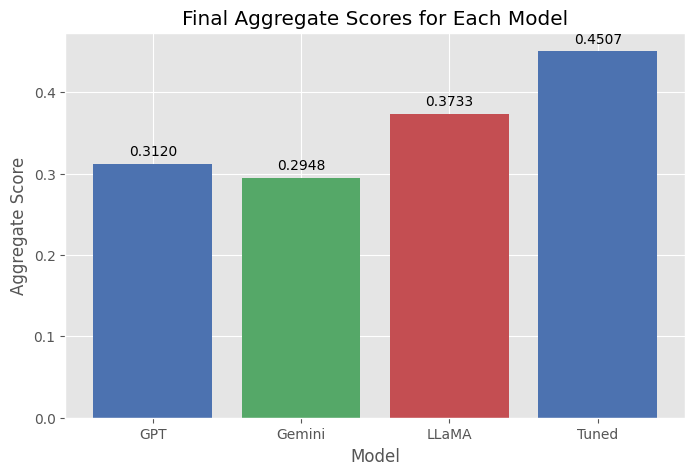

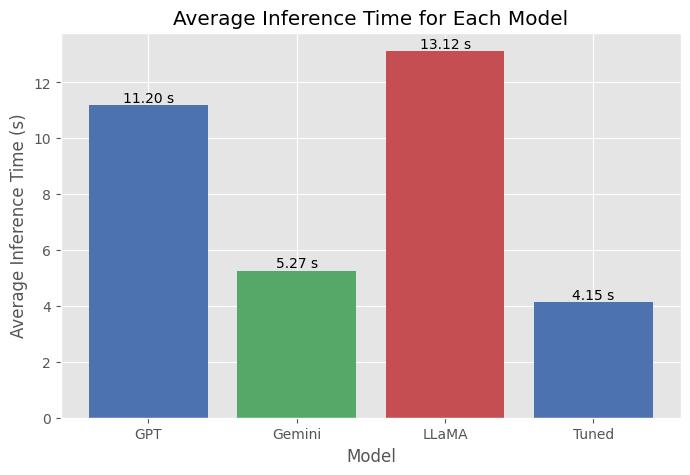

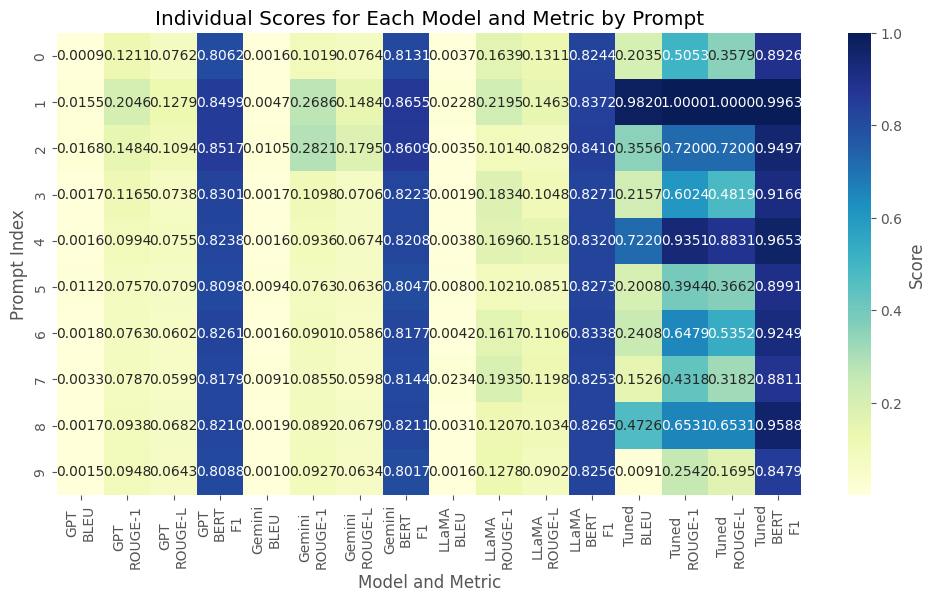

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# You can adjust the plotting as long as it prints meaningful results.

# Set style for better visuals
plt.style.use('ggplot')

# Visualization 1: Bar Chart for Final Aggregate Scores
plt.figure(figsize=(8, 5))
plt.bar(final_scores_df["Model"], final_scores_df["Final Aggregate Score"], color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Final Aggregate Scores for Each Model")
plt.xlabel("Model")
plt.ylabel("Aggregate Score")
for index, value in enumerate(final_scores_df["Final Aggregate Score"]):
    plt.text(index, value + 0.01, f"{value:.4f}", ha="center")
plt.show()

# Visualization 2: Bar Chart for Average Inference Times
plt.figure(figsize=(8, 5))
plt.bar(average_inference_df["Model"], average_inference_df["Average Inference Time (s)"], color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Average Inference Time for Each Model")
plt.xlabel("Model")
plt.ylabel("Average Inference Time (s)")
for index, value in enumerate(average_inference_df["Average Inference Time (s)"]):
    plt.text(index, value + 0.1, f"{value:.2f} s", ha="center")
plt.show()

# Visualization 3: Heatmap for Individual Scores by Model and Metric
# Prepare data for heatmap
score_cols = [col for col in df_results.columns if "BLEU" in col or "ROUGE" in col or "BERT F1" in col]
heatmap_data = df_results[score_cols].fillna(0)  # Fill NaNs with 0 for visualization
heatmap_data.columns = [col.replace(" ", "\n") for col in heatmap_data.columns]  # Add line breaks for readability

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".4f", cbar_kws={'label': 'Score'})
plt.title("Individual Scores for Each Model and Metric by Prompt")
plt.xlabel("Model and Metric")
plt.ylabel("Prompt Index")
plt.show()


## 7. Experiment and Reflection

Congratulations on completing the Codeathon! Reflect on the experience of building and fine-tuning LLM-based chatbots. Briefly address the following:

* Experience and Challenges: Was it easy, fun, or challenging to set up and experiment with different LLMs? Describe any hurdles with API setup, inference times, or model tuning, and how you tackled them.

* Impact of Fine-Tuning: Reflect on how fine-tuning affected response quality—was there an improvement in coherence, relevance, or speed?

* Performance Metrics: Discuss the utility of metrics like BLEU, ROUGE, and BERTScore in assessing chatbot quality. Did using an aggregate score help in comparing models?

* User Engagement and Multimedia: If you tested multimedia features, did they add value to the chatbot experience?

Once you've reflected on these questions, consider experimenting further by setting up unique conversations or exploring how changes in configurations impact the responses.

Enjoy the possibilities with large language models!

I really enjoyed this assignment, I felt like I learned a lot and it was rewarding to see it connect and work like a fully connected product with just a few lines of code. It was fun and easy to set up the models but the llama one I had diffculty with because of the syntax, it was hard to find documentation online, however, it was workable. That one also took the longest to run, which was frustrating when I had to debug it. Fine-tuning helped with the response quality, with an improvement in coherence, relevance and speed. The metrics such as BLEU, ROUGE and BERTScore help us evaluate how well the model is doing, but each of them have their shortcomings. By combining them together, you get a more accurate review of your model overall. Aggregate score helps in comparing models because it gives each model one score that is helpful in qualitative comparison. It can have problems as it's prone to bias and oversimplification so it's not always the metric to look at, however, it's convenient to consider.